<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initialization" data-toc-modified-id="Initialization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialization</a></span><ul class="toc-item"><li><span><a href="#Graphics" data-toc-modified-id="Graphics-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Graphics</a></span></li></ul></li><li><span><a href="#Getting-Ready" data-toc-modified-id="Getting-Ready-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Getting Ready</a></span><ul class="toc-item"><li><span><a href="#Base-Integrator-Settings" data-toc-modified-id="Base-Integrator-Settings-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Base Integrator Settings</a></span></li><li><span><a href="#Initial-Conditions" data-toc-modified-id="Initial-Conditions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Initial Conditions</a></span></li></ul></li><li><span><a href="#Batch-Execution" data-toc-modified-id="Batch-Execution-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Batch Execution</a></span></li><li><span><a href="#Batch-Processing." data-toc-modified-id="Batch-Processing.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Batch Processing.</a></span><ul class="toc-item"><li><span><a href="#Loading-and-Conversion" data-toc-modified-id="Loading-and-Conversion-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Loading and Conversion</a></span></li><li><span><a href="#2D-Preview" data-toc-modified-id="2D-Preview-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>2D Preview</a></span></li></ul></li></ul></div>

# Initialization

In [1]:
###### Do not touch
MinVersion = 23

import PyUltraLight2 as PyUL

if (PyUL.S_version < MinVersion):
    raise RuntimeError("You need the latest PyULN!")

import numpy as np

np.set_printoptions(suppress=True)

import math

import numba
import numexpr as ne
import time
import pyfftw
import os
import sys
import multiprocessing
import numpy

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec
import matplotlib.animation
from matplotlib.offsetbox import AnchoredText

import IPython
from IPython.core.display import clear_output, display, Video

from numpy import sqrt, exp, log, log10, sin, cos, tan, pi

%reload_ext autoreload
%autoreload 2


# Useful Aux Functions
ToCode = PyUL.convert
ToPhys = PyUL.convert_back
CB = PyUL.convert_between

printU = PyUL.printU


m22 = PyUL.axion_E / 1e-22

printU(f"m22 = {m22:.3g}", 'universe')

Axion Mass (eV).1e-21
PyUL2.Universe: Axion Mass: 1e-21 eV.
PyUL2.23.12: (c) 2020 - 2021 Wang., Y. and collaborators. 
Auckland Cosmology Group

Original PyUltraLight Team:
Edwards, F., Kendall, E., Hotchkiss, S. & Easther, R.
arxiv.org/abs/1807.04037
PyUL2.universe: m22 = 10


## Graphics

In [3]:
plt.style.use('default')

plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams["text.usetex"]= False
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.facecolor'] = 'w'

from matplotlib.colors import LinearSegmentedColormap
Palette = 'magma'
cyccol=['#000000', '#ffffff','#000000']
divcol=['#003262','#005b96','#ffffff','#d5a756','#B51700']
divcols=['#005b96','#ffffff','#d5a756']

CycPalette = LinearSegmentedColormap.from_list('myCyc', cyccol)

DivPalette  = LinearSegmentedColormap.from_list('myDiv', divcol)
DivPaletteS  = LinearSegmentedColormap.from_list('myDiv', divcols)

EFigSize = (20,12)
EFigSizeMono = (20,6)
VideoSize = (8,8)
FPS = 10
DPI = 72

FrameCap = 60 # Maximum Number of Frames to Animate

########################################

# BH Trajectory

Colors = np.array([[209,17,65],[0,177,89],[0,174,219],[243,119,53],[255,196,37]])/255

# NBody
ENStyle = '-'
ENColor = '#ff6c0e' # NBody

EKColor = '#8dd9e7'
EPColor = '#fd8dc8'

# ULDM
EUStyle = '-'
EUColor = '#7f1717' # ULDM

EQColor = '#ccb603' # Kinetic 
ERColor = '#6cc25c' # Self-Interaction
EGColor = '#2c8899' # Particle Potential

# Totals
ETStyle = '-'
ETColor = '#080808'

# Auxiliary 
HelperStyle = 'k.'
EmphColor = 'black'
GeomColor = 'olivedrab'

# Getting Ready

## Base Integrator Settings

In [46]:
resol = 128

length, length_units = 4.5, 'kpc' #
duration, duration_units = 400, 'Myr' #

start_time = 0. # For solitons only: Pre-evolve the wavefunction phase.

NS = 32

save_format = 'npy' # npy, npz, hdf5

step_factor = 1 # Keep it on default

save_number = 500

PyUL.DispN(duration,duration_units,length,length_units,resol,step_factor,save_number)

# You can also set it to 'Minimum' to only save all 1D mesh Data.
Save_Options = 'Energy NBody DF 2Density 2Phase 2GravF'

#This Boolean List is for program's internal use
save_options = PyUL.SaveOptionsDigest(Save_Options)

s_mass_unit = 'M_solar_masses'
s_position_unit = 'kpc'
s_velocity_unit = 'km/s' 
m_mass_unit = s_mass_unit
m_position_unit = s_position_unit
m_velocity_unit = s_velocity_unit


Uniform = False # if True, then there won't be solitons.
Density = 0
UVel = [0,0,0] # Uses s_velocity_units
density_unit = '' # Accepted units: 'MSol/pc3', 'kg/m3', and '' for dimensionless units

The required number of ULDM steps is 1992
The actual ULDM steps is 2000


0.017662930925426236

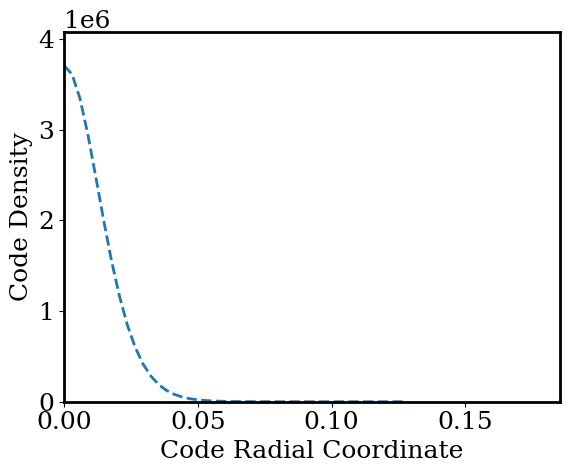

In [47]:
mS = 12 # User Input

Phase = 0 # Multiples of pi

PyUL.SolitonSizeEstimate(mS,length,resol,s_mass_unit,length_units, Plot = True)

## Initial Conditions

In [48]:
save_path = 'Batches/MR_Linear'

PyUL.DSManagement(save_path, Force = False)

[ Batches/MR_Linear ] : The current size of the folder is 66.527 Mib
[ Batches/MR_Linear ] : Do You Wish to Delete All Files Currently Stored In This Folder? [Y] 

Y
Folder Cleaned! 

[ Batches/MR_Linear ] : Save Folder Created.


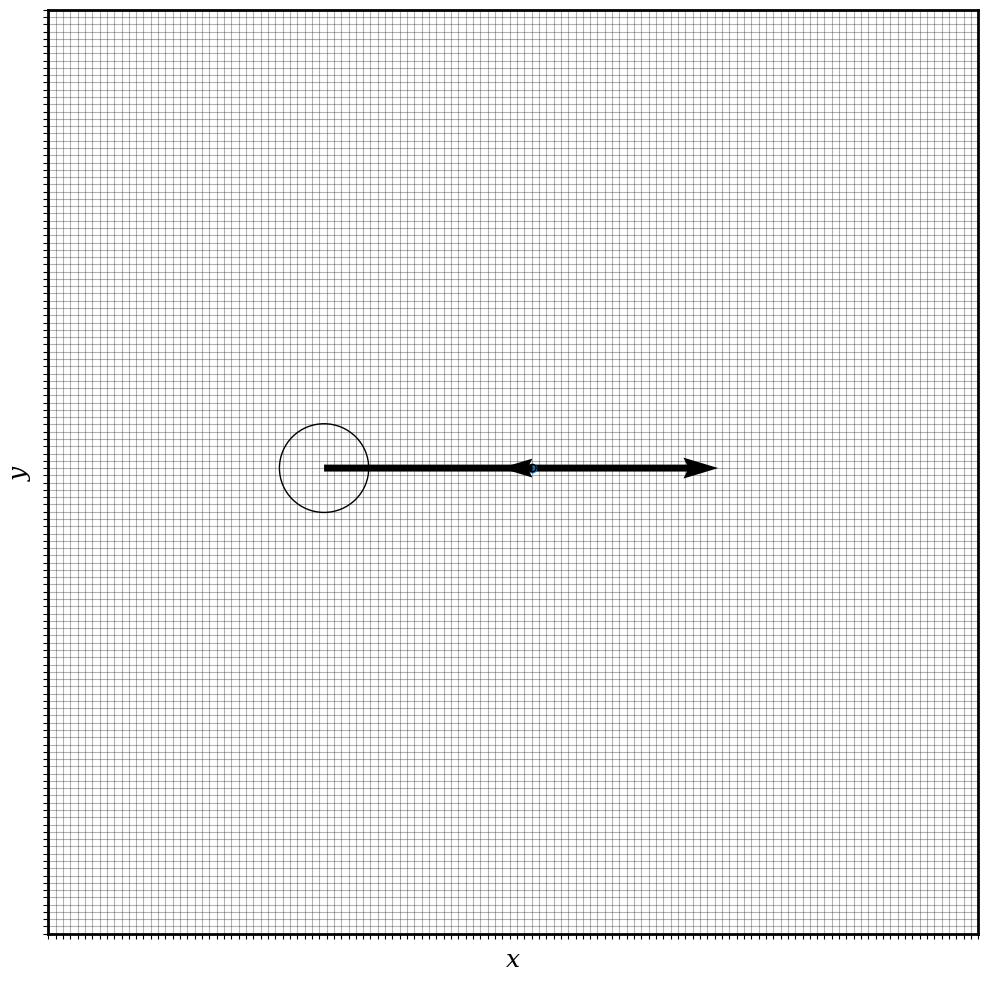

In [56]:
v0 = 15 # km/s
dist = 1

Ratio = 12.5

gridspace = PyUL.MeshSpacing(resol,length,length_units, silent = True)

rP = 1/2 * gridspace

a = PyUL.GenPlummer(rP,length_units)

mP = mS * Ratio# User Input

M = mS + mP
# Unit 1
y1 = dist*mS/M
yDot1 = v0*mS/M

# Unit 2
y2 = dist*mP/M
yDot2 = v0*mP/M

embeds    = []

particles =  [[mP,[0,y1,0],[0,-yDot1,0]]]
solitons  =  [[mS,[0,-y2,0],[0,yDot2,0],Phase*np.pi]]


ImpactB = 1.2 # Impact Parameter. In Grid Length Units.
Separation = 0 # Same unit as position.

MIn, vRel0 = PyUL.DefaultSolitonOrbit(resol,length, length_units, mS, s_mass_unit, ImpactB, m_position_unit, m_velocity_unit)

fig,ax = PyUL.VizInit2D(length,length_units,resol,embeds,
              solitons,s_position_unit, s_mass_unit,
              particles,m_position_unit, Uniform, Density, density_unit, rP, vRel0*5)


In [57]:
#================================================================

Initpath = ''

run_folder = PyUL.GenerateConfig(NS, length, length_units,
                                 resol, duration, duration_units, step_factor,
                                 save_number, Save_Options, save_path,
                                 save_format, s_mass_unit, s_position_unit,
                                 s_velocity_unit, solitons,start_time,
                                 m_mass_unit, m_position_unit, m_velocity_unit,
                                 particles,embeds, Uniform,Density,density_unit,
                                 a,UVel,False,'')

What is the name of the run? Blank to use generated timestamp. ABORT to cancel compilation.
Lin128_VHeavy
ULHelper: Compiled Config in Folder Lin128_VHeavy


[**Back to the Top**](#root)
<a id='run'></a>
# Batch Execution

This creates a timestamped folder using the current settings, and the integrator stores all requested files in it too.

In [54]:
FullSim = True
Shift = False
T0 = time.time()
runs = os.listdir(save_path)
runs.sort()

NRuns = len(runs)

Run = 0

for run_folder in runs:
    
    if os.path.isdir(f'{save_path}/{run_folder}'):
        
        RunText = f'Simulation #{Run+1} out of {NRuns}'
        PyUL.evolve(save_path,run_folder,
            NBodyInterp = FullSim, SelfGravity = FullSim, NBodyGravity = True, 
            Silent = True, Shift = Shift, AutoStop = False, AutoStop2 = False, Message = RunText,
                   Stream = False, StreamChar = [1,4])

        Run +=1

        print(f'Simulation {Run} finished.')
        time.sleep(2)
        
import IPython
IPython.display.Audio("Done.mp3",autoplay=True)

print(f"{time.time()-T0:.3g}s")

Build 2021 Jun 08
Message: Simulation #2 out of 4
PyUL2.Runtime: Simulation name is ./Batches/MR_Linear/Lin128_Heavy
PyUL2.Runtime: 128 Resolution for 400Myr
PyUL2.Runtime: Simulation Started at 21/06/2021, 13:37:56.
PyUL2.Runtime: Taking 2000 ULDM steps @ 500 snapshots


[●●●●●●●●●●●●●●●●●●●●] 100%      Exp. Time: 21/06/2021, 13:41:34 (Prev.: 0.15s) 

PyUL2.Runtime: Run Complete. Time Elapsed (d:h:m:s): 0:0:3:37.55
Simulation 2 finished.
424s


# Batch Processing.

In [55]:
### Initializing Journaling Variables

#### Dummies and Aux
TimeLog = [] # Time Series
ResoLog = [] # Resolutions
PlRaLog = [] # Plummer Radii

#### Core Variables
IniRLog = [] # Initial Radius Handle
MaRaLog = [] # Mass Ratio Handle

TMMaLog = [] # NBody Mass

TMDSLog = [] # NBody Traj
TMDNLog = [] # NBody Kinetic Energies
TMDFLog = [] # NBody EK + EP

DyTSLog = [] # Dynamical Timescale (Corrected by C)
IniDLog = [] # Initial Density
MEncLog = []

TotELog = []
ULKQLog = []

Run = 0


In [45]:
save_path = './Batches/' + PyUL.Runs('./Batches', Automatic = False)

runs = os.listdir(save_path)
runs.sort()


for run_folder in runs:
    loc = './' + save_path + '/' + run_folder
    if os.path.isdir(loc):
        
        # Reload Config.. Why don't I use a class?
        NS, length, length_units, resol, duration, duration_units, step_factor, save_number, save_options, save_format, s_mass_unit, s_position_unit, s_velocity_unit, solitons,start_time, m_mass_unit, m_position_unit, m_velocity_unit, particles, embeds, Uniform,Density, density_unit ,a, UVel = PyUL.LoadConfig(loc)

        if save_number == -1:
            sim_number = PyUL.ULDStepEst(duration,duration_units,
                                                  length,length_units,
                                                  resol,step_factor, 
                                                  save_number = -1)
        else:
            sim_number = save_number

        # Dict of Run Data
        EndNum, Loaded = PyUL.Load_npys(loc,save_options)

        TMdata = Loaded['NBody']
        
        Loaded = {}

        NBo = len(particles)

        # Time
        durationMyr = CB(duration,duration_units,'Myr','t')

        # Space
        lengthKpc = CB(length,length_units,'kpc','l')
        lengthC = ToCode(length,length_units,'l')

        # Mass

        MassList_MSol = []
        MassListSI = []
        for TM in particles:
            MassList_MSol.append(CB(TM[0],m_mass_unit,'M_solar_masses','m'))
            MassListSI.append(CB(TM[0],m_mass_unit,'kg','m'))

        # Density
        DensitySI = CB(Density,density_unit,'kg/m3','d')
        DensityC = ToCode(Density,density_unit,'d')

        ## Misc. Pre-Multipliers


        # NBody_State Vector

        XPre = ToPhys(1,'kpc','l')
        VPre = ToPhys(1,'km/s','v')

        XPreSI = ToPhys(1,'m','l')
        VPreSI = ToPhys(1,'m/s','v')

        IArray = np.arange(len(TMdata[0]))

        # Dimensionful NBody State

        TMDataS = np.array(TMdata)
        TMDataSI = np.array(TMdata)

        TMDataS[:,IArray % 6 <= 2] *= XPre
        TMDataS[:,IArray % 6 >= 3] *= VPre


        TMDataSI[:,IArray % 6 <= 2] *= XPreSI
        TMDataSI[:,IArray % 6 >= 3] *= VPreSI


        # Rho data
        DPre = CB(1,density_unit,'kg/m3','d')
        # Energy
        EPre = PyUL.energy_unit
        # Field Strength
        PPre = PyUL.mass_unit / PyUL.length_unit
        
        
        
        
        # U ENERGY
        
        # Total Energy from Integrator
        egylist = np.load('{}{}'.format(loc, '/Outputs/egylist.npy'),allow_pickle=True) * EPre

        # Energy Due to N Body Potential
        egpcmlist =  np.load('{}{}'.format(loc, '/Outputs/egpcmMlist.npy'),allow_pickle=True) * EPre # NEW
        egpcmlist2 = np.load('{}{}'.format(loc, '/Outputs/egpcmlist.npy'),allow_pickle=True) * EPre # OLD

        # Energy Due to ULDM Self-Interaction
        egpsilist = np.load('{}{}'.format(loc, '/Outputs/egpsilist.npy'),allow_pickle=True) * EPre

        # Energy Due to Quantum Fun
        ekandqlist = np.load('{}{}'.format(loc, '/Outputs/ekandqlist.npy'),allow_pickle=True) * EPre

        mtotlist = np.load('{}{}'.format(loc, '/Outputs/masseslist.npy'),allow_pickle=True) * EPre


        # Translating Snapshots back to Time
        
        timerange = np.linspace(0,durationMyr,save_number+1)

        Tp = np.arange(EndNum)

        Tp = Tp * durationMyr / (sim_number+1)

        TpSec = PyUL.convert_between(Tp,'Myr','s','t')
        # Reconstruct NBody Energy (Real)
        NBo, KS, PS = PyUL.NBodyEnergy(MassListSI,TMDataSI,EndNum, a, length_units)
        rP = PyUL.RecPlummer(a,length_units)
        

        
        # Section 5 Key Information Recreation
        
        mP = PyUL.convert(particles[0][0],m_mass_unit,'m')
        
        mS = PyUL.convert(solitons[0][0],s_mass_unit,'m')
        
        xP = np.array(particles[0][1])
        sP = np.array(solitons[0][1])
        
        xPC = PyUL.convert(xP,m_position_unit,'l')
        sPC = PyUL.convert(sP,s_position_unit,'l')
        
        rC = np.linalg.norm(xPC-sPC)
        
        rU = PyUL.convert_back(rC,'kpc','l')
        
        MaRa = mP / mS
        
        MIn, vRel0 = PyUL.DefaultSolitonOrbit(resol,length, 
                                              length_units, mS, '', rC, '', m_velocity_unit)
        
        MInSI = PyUL.convert_between(MIn,s_mass_unit,'kg','m')
        vRel0SI = PyUL.convert_between(vRel0,m_velocity_unit,'m/s','v')
        MBHSI = PyUL.convert_between(mP,m_mass_unit,'kg','m')
        RSI = PyUL.convert_between(rC,'','m','l')
        
        Density0 = PyUL.ReadLocalDensity(loc)
        DensitySI = PyUL.convert_between(Density0,'','kg/m3','d')
        
        print(MInSI, vRel0SI, MBHSI, RSI, DensitySI)
        
        T = PyUL.convert_between((MInSI)**(3/2) / (4*pi*np.sqrt(PyUL.G)*MBHSI*DensitySI*RSI**(3/2)),'s','Myr','t')

        print(T, 'Myr')
        
        CLow = 1/3 * (PyUL.axion_mass / PyUL.hbar)**2 * PyUL.G*RSI*MInSI
                
        TimeLog.append(Tp)
        ResoLog.append(resol)
        PlRaLog.append(rP)
        
        TMMaLog.append(mP)
        TMDSLog.append(TMDataS[:,0:3])
        TMDNLog.append(KS)
        TMDFLog.append(KS + egpcmlist)
        
        DyTSLog.append(T/CLow)
        IniDLog.append(DensitySI)

        ULKQLog.append(ekandqlist)

        #
        
        IniRLog.append(np.round(rU,4))
        MaRaLog.append(np.round(MaRa,4))
        MEncLog.append(MIn/mS)
        
        
        # Energy
        
        MES = (PS + KS)
        MESD = PyUL.GetRel(MES)

        EKQD = PyUL.GetRel(ekandqlist)
        EGPD = PyUL.GetRel(egpsilist)

        ECMD = PyUL.GetRel(egpcmlist)
        ECOD = PyUL.GetRel(egpcmlist2)

        KSD = PyUL.GetRel(KS)
        PSD = PyUL.GetRel(PS)

        EUOld  = egylist
        EUOldD = PyUL.GetRel(EUOld)

        EUNew  = egpsilist + ekandqlist + egpcmlist2
        EUNewD = PyUL.GetRel(EUNew)

        ETOld  = EUOld + MES
        ETOldD = PyUL.GetRel(ETOld)

        ETNew  = EUNew + MES
        
        
        TotELog.append(ETNew)
        
        Run += 1
        
        clear_output()
        
        
printU('Processing Complete!','IO')

[1]: MR_Final
[2]: MR_Final_Corner
[3]: MR_Final_Hires
[4]: MR_Final_Lowres
[5]: MR_Linear
[6]: MR_PRO_256
[7]: MR_Pro
Which folder do you want to analyse? Blank to load the latest one. 'X[Number]' to Delete


KeyboardInterrupt: Interrupted by user

In [13]:
len(DyTSLog)

95

In [14]:
InterpolateCurve = PyUL.InterpolateCurve

In [15]:
DyTSLog

[61.5180367595271,
 984.9955187796163,
 492.4827044589248,
 246.22194932058707,
 123.08599272147762,
 61.510688231131496,
 828.1413719919213,
 414.0422605443734,
 206.9913463028069,
 103.46294300499565,
 51.72335264903342,
 732.710753347791,
 366.3319379009789,
 183.140373146683,
 91.5952498318232,
 45.820593910144375,
 673.8863186696179,
 336.9651578103715,
 168.49675319385395,
 84.25795795048236,
 42.12935309748768,
 638.80481378762,
 319.3959947525174,
 159.6921816853539,
 79.83967425503717,
 39.91635724047043,
 620.6148907479941,
 310.29479028632574,
 155.13746176367545,
 77.56721865266174,
 38.745725229976856,
 615.1574898153827,
 307.5774327634105,
 153.79938333784764,
 76.93191957685073,
 38.488657340126316,
 652.7360811488599,
 326.3244652371979,
 163.15804725919332,
 81.63862642738988,
 40.8651434428256,
 756.5877200431534,
 378.10049609611946,
 188.9518071672816,
 94.54633730147322,
 47.35035681396963,
 983.5508595057589,
 758.5845236995029,
 61.47707935621437,
 47.4210931786

301 0
201 5
201 48
6202 54


Text(0, 0.5, 'Relative BH Total Energy')

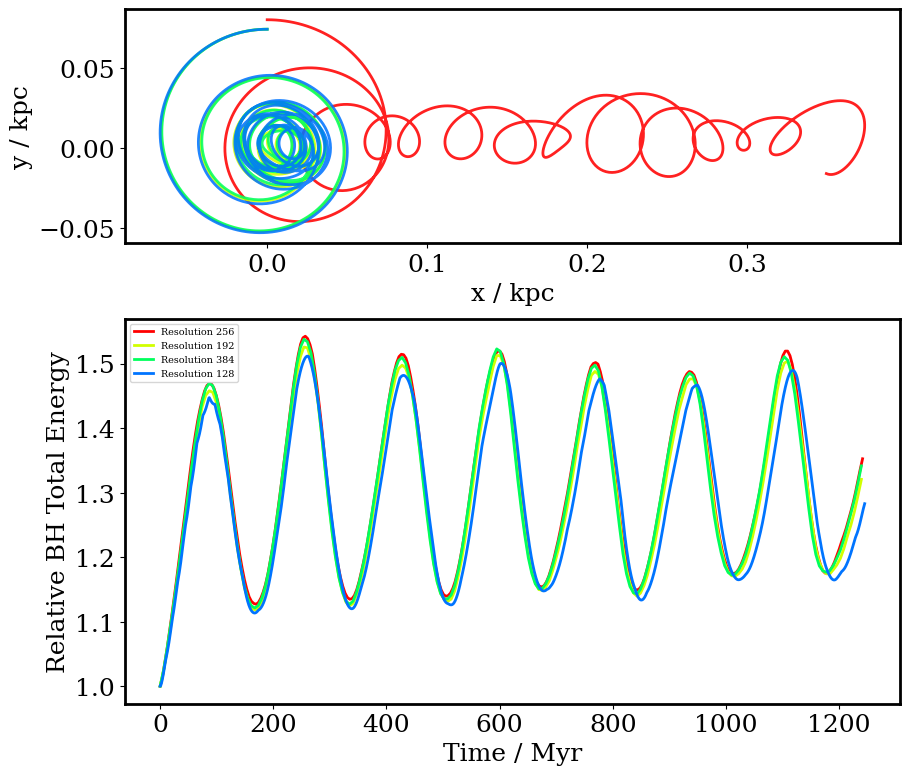

In [16]:
fig = plt.figure(figsize = (10,10), dpi = 100)


BaseGrid = plt.GridSpec(2, 1, hspace=0)

ax = fig.add_subplot(BaseGrid[0,0])
axE = fig.add_subplot(BaseGrid[1,0])

ax.set_aspect('equal')

Color = plt.cm.hsv(np.linspace(0,1,6))

RadSlice = 0

def ConditionT(i):
    
    return (IniRLog[i] == 0.08) and (MaRaLog[i] == 0.08)

def ConditionE(i):
    
    return (IniRLog[i] == 0.08) and (MaRaLog[i] == 0.08)

ColorInd = 0

for i in range(len(ResoLog)):
    
    Data = TMDSLog[i]
    
    
    if ConditionT(i):
    
        TraX, TraY = InterpolateCurve(Data[:,1],Data[:,0])
    
        ax.plot(TraX,TraY, lw = 2, color = Color[ColorInd], alpha = 0.87)
    
    if ConditionE(i):
        axE.plot(TimeLog[i],TMDFLog[i]/TMDFLog[i][0], color = Color[ColorInd],label = f'Resolution {ResoLog[i]}') 
        
        #axE.plot(TimeLog[i],TotELog[i]/TotELog[i][0]-1,'--', color = Color[ColorInd],label = f'Ratio = 1/{1/MaRaLog[i]:.1f}')
        #axE.vlines(DyTSLog[i],0,1, color = Color[ColorInd], zorder = 100, lw = 2)
        print(len(TimeLog[i]),i)
        
        ColorInd += 1
axE.legend(fontsize= 7)


lengthSI = PyUL.convert_between(lengthKpc,'kpc','m','l')

#Zoom = 6

#ax.set_xlim(-lengthSI/2/Zoom,lengthSI/2/Zoom)
#ax.set_ylim(-lengthSI/2/Zoom,lengthSI/2/Zoom)

ax.set_xlabel('x / kpc')
ax.set_ylabel('y / kpc')

axE.set_xlabel('Time / Myr')
axE.set_ylabel('Relative BH Total Energy')


301 0
201 5
6202 54


Text(0, 0.5, 'System Relative Energy Change')

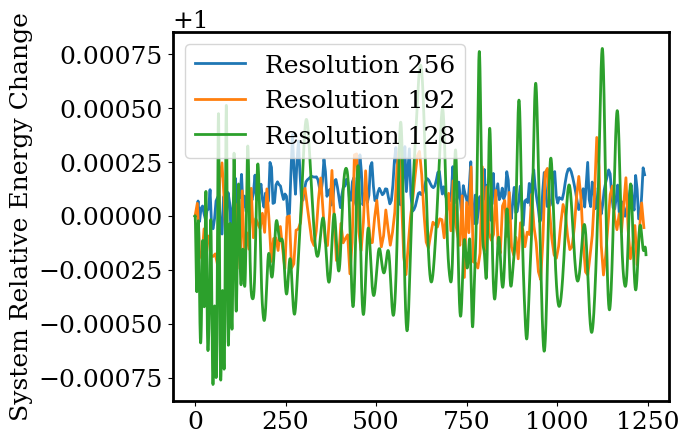

In [25]:
plt.figure()

for i in range(len(ResoLog)):
    
    if ConditionE(i):
        if ResoLog[i] == 384:
            continue
        plt.plot(TimeLog[i],TotELog[i]/TotELog[i][0],label = f'Resolution {ResoLog[i]}') 
        
        #axE.plot(TimeLog[i],TotELog[i]/TotELog[i][0]-1,'--', color = Color[ColorInd],label = f'Ratio = 1/{1/MaRaLog[i]:.1f}')
        #axE.vlines(DyTSLog[i],0,1, color = Color[ColorInd], zorder = 100, lw = 2)
        print(len(TimeLog[i]),i)

        
plt.legend()
plt.ylabel('System Relative Energy Change')

1241.347202428459
1239.288583518959
1239.288583518959
1245.0834513836967


NameError: name 'RadiusList' is not defined

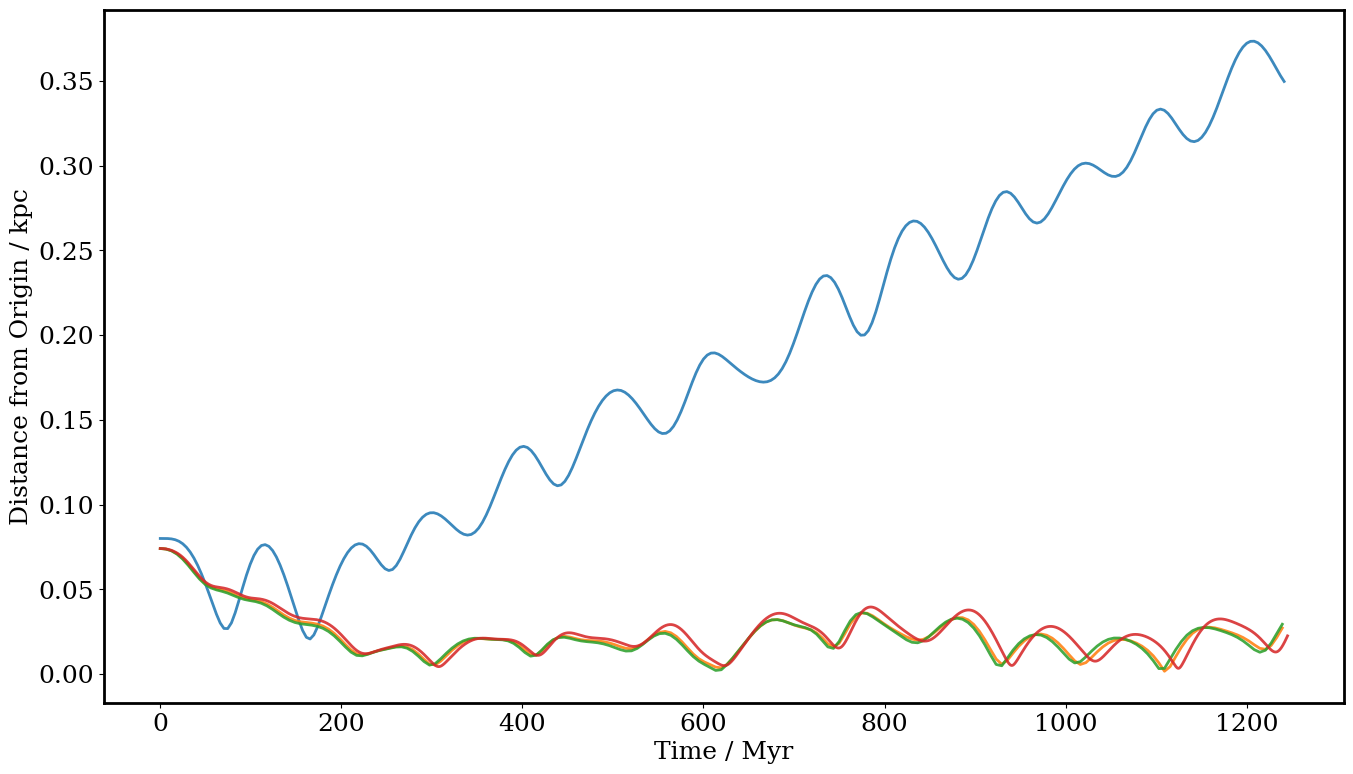

In [18]:
fig = plt.figure(figsize = (16,9), dpi = 100)

ax = fig.add_subplot(111)

Color = plt.cm.hsv(np.linspace(0,1,len(ResoLog)))

RadSlice = 8

for i in range(len(ResoLog)):
    
    Data = TMDSLog[i]
    
    if ConditionE(i):
    
        TraX, TraY = Data[:,1],Data[:,0]
    
        Radius = np.sqrt(TraX**2+TraY**2)
    
        ax.plot(TimeLog[i],Radius, lw = 2, alpha = 0.87)
        print(TimeLog[i][-1])
    
axE.legend(fontsize= 7)


lengthSI = PyUL.convert_between(lengthKpc,'kpc','m','l')

#Zoom = 6

#ax.set_xlim(-lengthSI/2/Zoom,lengthSI/2/Zoom)
#ax.set_ylim(-lengthSI/2/Zoom,lengthSI/2/Zoom)

ax.set_xlabel('Time / Myr')
ax.set_ylabel('Distance from Origin / kpc')

axE.set_xlabel('Time / Myr')
axE.set_ylabel('Relative BH Kinetic Energy')



ax.set_title(f'{save_path}: Initial Distance = {RadiusList[RadSlice]} kpc', fontsize = 12)

31
34


Text(0.5, 0, 'x / kpc')

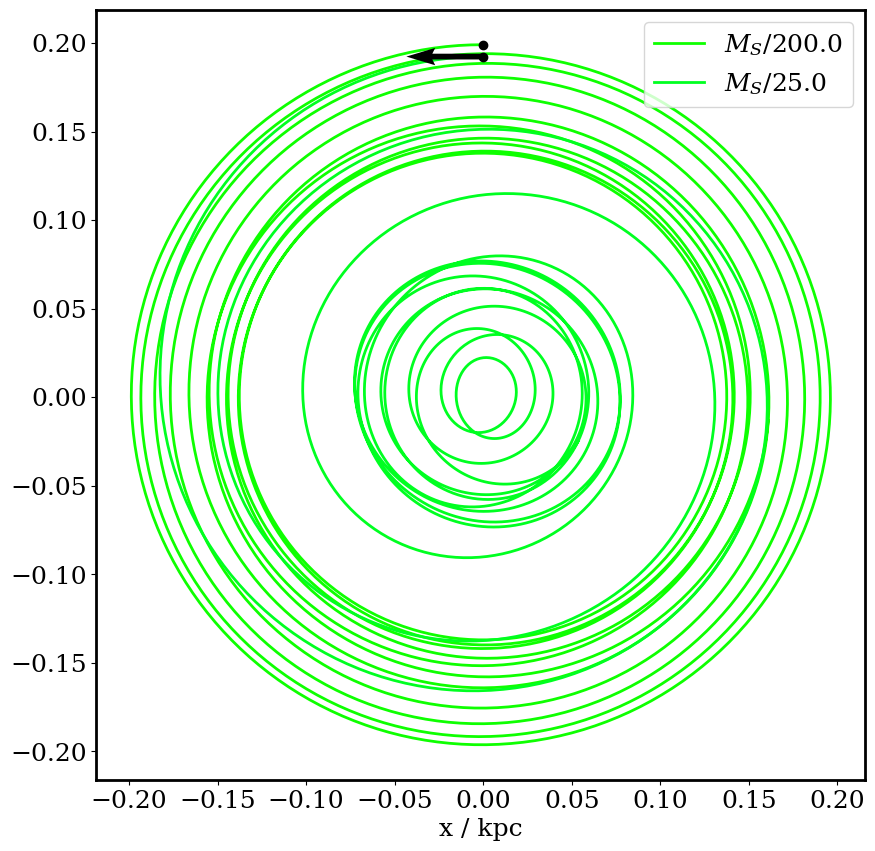

In [19]:
TrajFi = plt.figure(figsize = (10,10))

axT = TrajFi.add_subplot(111)
axT.set_aspect('equal')

for i in range(len(ResoLog)):
    
    if i == 34 or i == 31:
        Data = TMDSLog[i]
        TraX, TraY = InterpolateCurve(Data[:,1],Data[:,0])
    
        axT.plot(TraX,TraY, lw = 2, color = Color[i], label = f'$M_S/{1/MaRaLog[i]:.1f}$')
        
        axT.scatter(Data[0,1],Data[0,0], color = 'k', zorder =100)
        print(i)
        
axT.quiver(Data[0,1],Data[0,0],-1,0, zorder = 102, scale = 10)
        
#axT.set_xlim(-0.2,0.6)
axT.legend()

axT.set_xlabel('x / kpc')

In [ ]:
Data[0,1]

## Loading and Conversion

In [ ]:
run_folder = PyUL.Runs(save_path)

In [ ]:
loc = './' + save_path + '/' + run_folder
TimeStamp = run_folder
# Reload Config.. Why don't I use a class?
NS, length, length_units, resol, duration, duration_units, step_factor, save_number, save_options, save_format, s_mass_unit, s_position_unit, s_velocity_unit, solitons,start_time, m_mass_unit, m_position_unit, m_velocity_unit, particles, embeds, Uniform,Density, density_unit ,a, UVel = PyUL.LoadConfig(loc)

if save_number == -1:
    sim_number = PyUL.ULDStepEst(duration,duration_units,
                                          length,length_units,
                                          resol,step_factor, 
                                          save_number = -1)
else:
    sim_number = save_number
    
# Dict of Run Data
EndNum, Loaded = PyUL.Load_npys(loc,save_options, LowMem = False)


Load2D = True
Load1D = False

if Load2D:
    #phasedata = Loaded['2Phase']
    #phidata  = Loaded['2Grav']
    #phidataF = Loaded['2GravF']
    data = Loaded['2Density']

if Load1D:
    #phi1D  = Loaded['1Grav']
    phiF1D = Loaded['1GravF']
    linedata = Loaded['1Density']

TMdata = Loaded['NBody']
graddata = Loaded['DF']

NBo = len(particles)

ToCode = PyUL.convert
ToPhys = PyUL.convert_back
CB = PyUL.convert_between

# Time
durationMyr = CB(duration,duration_units,'Myr','t')

# Space
lengthKpc = CB(length,length_units,'kpc','l')
lengthC = ToCode(length,length_units,'l')

# Mass

MassList_MSol = []
MassListSI = []
for TM in particles:
    MassList_MSol.append(CB(TM[0],m_mass_unit,'M_solar_masses','m'))
    MassListSI.append(CB(TM[0],m_mass_unit,'kg','m'))
    
# Density
DensitySI = CB(Density,density_unit,'kg/m3','d')
DensityC = ToCode(Density,density_unit,'d')

## Misc. Pre-Multipliers

Tp = np.arange(EndNum)
Tp = Tp * durationMyr / (sim_number+1)

# NBody_State Vector

XPre = ToPhys(1,'kpc','l')
VPre = ToPhys(1,'km/s','v')

XPreSI = ToPhys(1,'m','l')
VPreSI = ToPhys(1,'m/s','v')

IArray = np.arange(len(TMdata[0]))

# Dimensionful NBody State

TMDataS = np.array(TMdata)
TMDataSI = np.array(TMdata)

TMDataS[:,IArray % 6 <= 2] *= XPre
TMDataS[:,IArray % 6 >= 3] *= VPre

TMDataSI[:,IArray % 6 <= 2] *= XPreSI
TMDataSI[:,IArray % 6 >= 3] *= VPreSI

# Rho data
DPre = CB(1,density_unit,'kg/m3','d')

# Energy
EPre = PyUL.energy_unit

# Field Strength
PPre = PyUL.mass_unit / PyUL.length_unit

# Momentum
pPreSI = PyUL.mass_unit * VPreSI

# Angular Momentum
LPreSI = pPreSI * PyUL.length_unit

if save_options[18]:
    i = 0
    pData = []
    Success = True

    while Success:

        try:
            pData.append(pPreSI*np.load(f'{loc}/Outputs/PMT_#{i:03d}.npy'))
            i+=1
        except:
            Success = False
            
if save_options[19]:
    i = 0
    LData = []
    Success = True

    while Success:

        try:
            LData.append(LPreSI*np.load(f'{loc}/Outputs/MVR_#{i:03d}.npy'))
            i+=1
        except:
            Success = False
    

print('Unit conversion ready!')


print("==============================================")
print(f"PyULN: Axion Mass Used is {PyUL.axion_E} eV.\n")

print(f"\
1 Mass Unit    = {PyUL.mass_unit:.5g} kg = {PyUL.convert_back(1,'solar_masses','m'):.4g} MSol\n\
1 Length Unit  = {PyUL.length_unit:.5g} m  = {PyUL.convert_back(1,'kpc','l'):.4g} kpc\n\
1 Time Unit    = {PyUL.time_unit:.5g} s  = {PyUL.convert_back(1,'Myr','t')/1000:.4g} Gyr\n\n\
1 Density Unit = {PyUL.mass_unit/PyUL.length_unit**3:.5g} kg/m^3 = {PyUL.mass_unit/PyUL.length_unit**3/PyUL.CritDens} Critical Density\n\
1 Speed Unit   = {PyUL.length_unit/PyUL.time_unit:.5g} m/s\n\
1 Energy Unit  = {EPre:.5g} Joules\n")

Loaded = {}

## 2D Preview

In [ ]:
Ncol=['#327bab','#ddb877','#ff0000']

Palette  = LinearSegmentedColormap.from_list('myDiv', Ncol)

# Number of ULDM SlicesIN BETWEEN start and end (which are always plotted).
NSlices = EndNum // 5
Zoom2D = 1

if NSlices >= EndNum:
    
    NSlices = EndNum

try:
    TSD = TimeStamp
except NameError:
    TimeStamp = 'Debug'

plt.clf()

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

Boundary = lengthKpc/(2*Zoom2D)

#plt.xlim([-Boundary,Boundary])
#plt.ylim([-Boundary,Boundary])

ax.set_aspect('equal', adjustable='box')

TMx = TMDataS[:,1::6]
TMy = TMDataS[:,0::6]

    
planemax = np.max(data)
planemin = np.min(data)

levels = np.linspace(0, planemax, 50)

PlotRange = np.linspace(-lengthKpc/2, lengthKpc/2,resol,endpoint = False)



#plt.contour(PlotRange,PlotRange,data[1], levels=levels,cmap = Palette)
plt.contour(PlotRange,PlotRange,data[-1], levels=levels,cmap = Palette)

plt.scatter([TMx[0]],[TMy[0]],color = 'k')
plt.scatter([TMx[-1]],[TMy[-1]],color = 'k')


if NSlices != 0 and EndNum >= NSlices:

    Blink = EndNum/(NSlices+1)

    Index = np.linspace(Blink,EndNum-Blink,NSlices)
    
    JU = 0
    for Ind in Index:
        j = int(Ind)

        plt.scatter([TMx[j]],[TMy[j]],color = 'k',zorder = 100+j)
        plt.contour(PlotRange,PlotRange,data[j], levels=levels,cmap = Palette, alpha = JU/NSlices/1.2)

        PyUL.prog_bar(iteration_number = NSlices, progress = j, tinterval = 0 ,status = '',adtl = '')
        JU+=1
   

Info = '\n'.join((
    TimeStamp,
    r'Number of Bodies: $%.0f$' % (NBo, ),
    r'Resolution: $%.0f^3$' % (resol, ),
    r'Box Length: %.3g kpc' % (lengthKpc, ),
    r'Simulation Time Length: %.3g Myr' % (durationMyr, ),
    r'Saved Snapshots: %.0f (%.0f Plotted)' % (EndNum,NSlices + 2)
    ))


TraX, TraY = InterpolateCurve(TMx,TMy)

ax.plot(TraX,TraY,'--', lw = 1, color = 'k')

ZoomOut = 0.5

ax.set_xlim(np.min(TMx)-ZoomOut,np.max(TMx)+ZoomOut)
ax.set_ylim(np.min(TMy)-ZoomOut,np.max(TMy)+ZoomOut)
    
ax.set_ylabel('$y$ / kpc')
ax.set_xlabel('$x$ / kpc')


plt.show()